# Fundamentals of Machine Learning (CSCI-UA.473)
## Lab 7 - Linear Dimensionality Reduction Methods : PCA, SVD, LDA

- The transformation of data from a high-dimensional space to a low-dimensional space
- The transformed representation retains as much information about the original representation as possible
- Useful for data visualization, cluster analysis and classification in fields such as signal processing and computer vision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from palmerpenguins import load_penguins

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE

## Principal Component Analysis (PCA): step-by-step

Computational goal: to find **Principal Components** that 


- Are linear combinations of the original ones

- Are uncorrelated with one another

- Are orthogonal in original dimension space

- Capture as much of the original variance in the data as possible

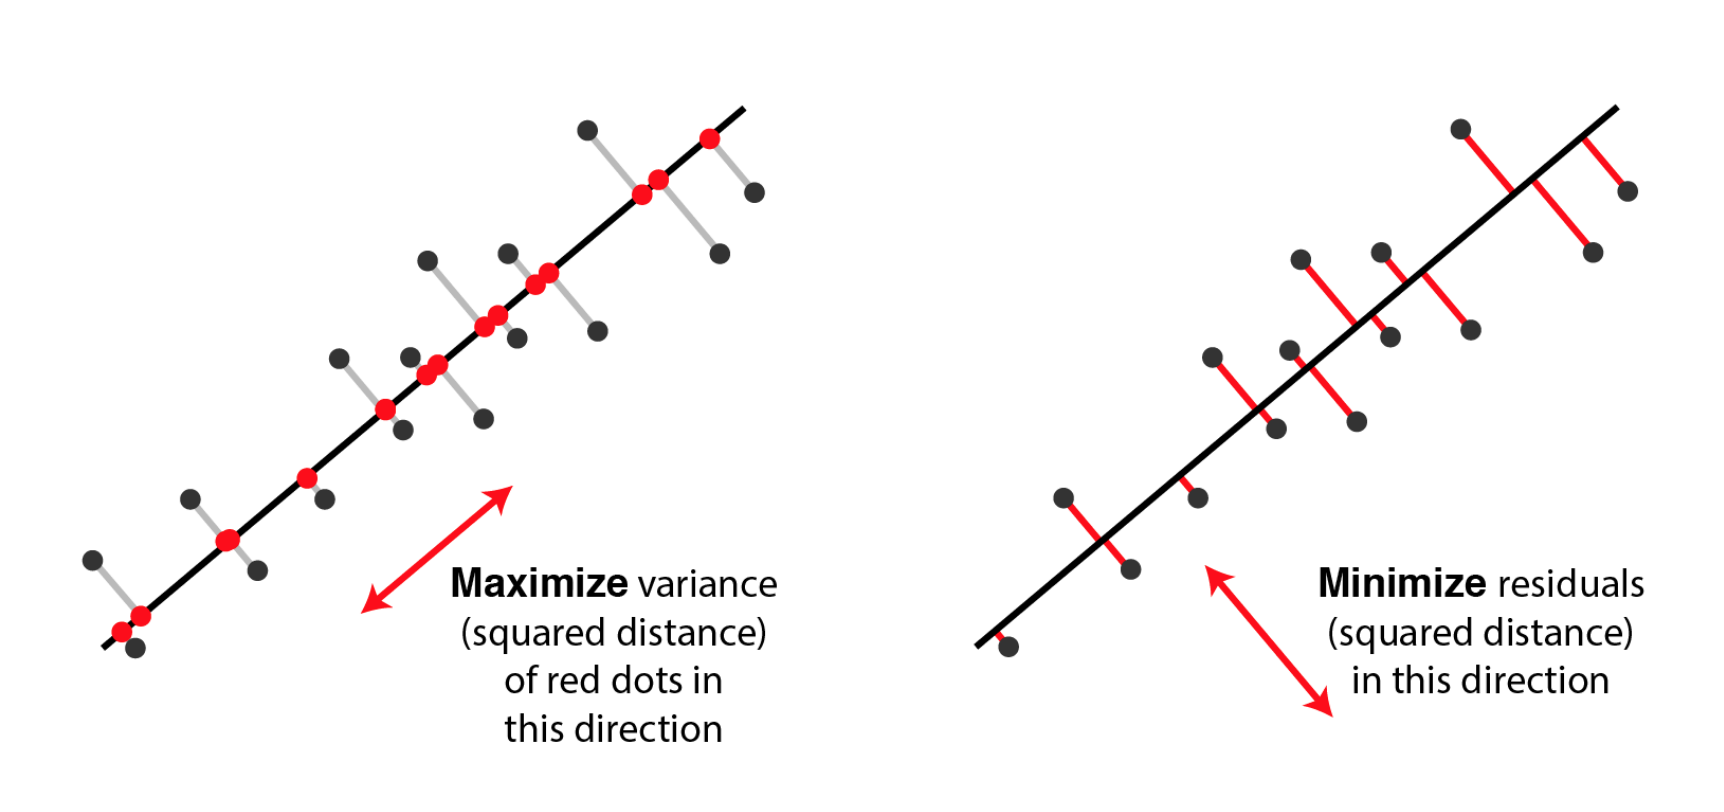

In [2]:
from IPython.display import Image
Image('pca.png', width=650)

Given some data represented as an $n\times d$ matrix $X$, where $n$ is the number of samples and $d$ is the dimension of data

In [3]:
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
print(X.shape, y.shape)

(1797, 64) (1797,)


Find the mean $\mu$ ($d$-dimensional vector) of all samples

In [4]:
mu = np.mean(X, axis=0)
print(mu)

[0.00000000e+00 3.03839733e-01 5.20478575e+00 1.18358375e+01
 1.18480801e+01 5.78185865e+00 1.36227045e+00 1.29660545e-01
 5.56483027e-03 1.99387869e+00 1.03823038e+01 1.19794101e+01
 1.02793545e+01 8.17584864e+00 1.84641068e+00 1.07957707e-01
 2.78241514e-03 2.60155815e+00 9.90317195e+00 6.99276572e+00
 7.09794101e+00 7.80634391e+00 1.78853645e+00 5.00834725e-02
 1.11296605e-03 2.46967168e+00 9.09126322e+00 8.82136895e+00
 9.92710072e+00 7.55147468e+00 2.31775181e+00 2.22593211e-03
 0.00000000e+00 2.33945465e+00 7.66722315e+00 9.07178631e+00
 1.03016138e+01 8.74401781e+00 2.90929327e+00 0.00000000e+00
 8.90372844e-03 1.58375070e+00 6.88146912e+00 7.22815804e+00
 7.67223150e+00 8.23650529e+00 3.45631608e+00 2.72676683e-02
 7.23427935e-03 7.04507513e-01 7.50695604e+00 9.53923205e+00
 9.41624930e+00 8.75848637e+00 3.72509738e+00 2.06455203e-01
 5.56483027e-04 2.79354480e-01 5.55759599e+00 1.20890373e+01
 1.18091263e+01 6.76405120e+00 2.06789093e+00 3.64496383e-01]


Compute the covariance matrix $C = (X-\mu)^T(X-\mu)$

In [5]:
C = (X - mu).T @ (X - mu)
print(C)

[[    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.          1478.10350584  4312.1869783  ...  -287.17195326
    176.93155259  -133.01502504]
 [    0.          4312.1869783  40604.63884252 ... -2075.17084029
   2536.01613801  1310.86533111]
 ...
 [    0.          -287.17195326 -2075.17084029 ... 62531.95770729
  28104.78575403  5164.54646633]
 [    0.           176.93155259  2536.01613801 ... 28104.78575403
  30051.71730662  8478.53144129]
 [    0.          -133.01502504  1310.86533111 ...  5164.54646633
   8478.53144129  6214.25486923]]


Compute the $k$ eigenvectors of $C$ (ordered by decreasing eigenvalues)

In [6]:
eigvals, eigvecs = np.linalg.eig(C)
print(eigvals.shape, eigvecs.shape, eigvals)

(64,) (64, 64) [3.21496446e+05 2.94037073e+05 2.54652037e+05 1.81576274e+05
 1.24845645e+05 1.06158911e+05 9.31846322e+04 7.90511316e+04
 7.23985475e+04 6.64731899e+04 5.12201980e+04 4.90688210e+04
 3.93350727e+04 3.82985444e+04 3.16755531e+04 3.04365675e+04
 2.84690963e+04 2.69480106e+04 2.19731138e+04 1.95527993e+04
 1.92056450e+04 1.72103456e+04 1.65706191e+04 1.56079022e+04
 1.50246390e+04 1.28697402e+04 1.24278509e+04 1.11225473e+04
 1.05694442e+04 9.25993694e+03 8.06636863e+03 7.62739288e+03
 7.26920014e+03 7.08235240e+03 6.65682453e+03 6.34284890e+03
 5.53989507e+03 4.91708884e+03 4.79910768e+03 4.56490331e+03
 4.10024545e+03 3.42540715e+03 3.26362959e+03 3.03517605e+03
 2.51794206e+03 2.32082511e+03 2.08144580e+03 1.67247113e+03
 1.20305167e+03 8.72973130e+02 4.53221377e+02 1.78078419e+02
 1.13382889e+02 1.09085014e+02 7.12405486e+01 2.68512122e+01
 1.52176384e+01 6.50809258e+00 2.29358383e+00 1.18764255e+00
 7.40353056e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]


Arrange such eigenvectors in a $d \times k$ matrix $E$

In [7]:
E = np.copy(eigvecs)
print(E.shape)

(64, 64)


Compute the projected samples as $P = X \cdot E$

In [8]:
P = X @ E
np.shape(P)

(1797, 64)

Plot the first $2$ principal components of $P$

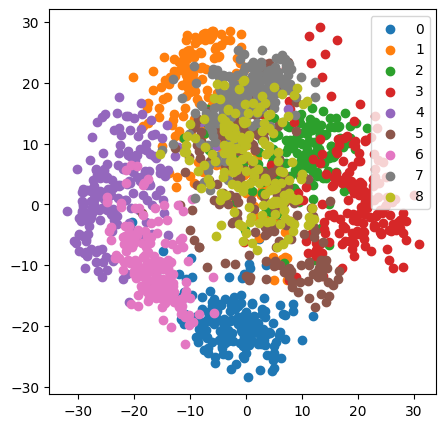

In [9]:
target_ids = range(len(mnist.target_names))
plt.figure(figsize=(5, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
for i, c, label in zip(target_ids, colors, mnist.target_names):
    plt.scatter(P[y == i, 0], P[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

Compute the reconstruction as $\tilde{X} = P \cdot E^T$

In [10]:
X_recon = P @ E.T
print(X_recon.shape)

(1797, 64)


Compute the root-mean-square error (RMSE) between the actual versus reconstructed data

In [11]:
rmse = np.sqrt(np.mean((X - X_recon)**2))
print(rmse)

5.80783835434653e-14


## Principal Component Analysis (PCA) using scikit-learn

Load the mnist dataset once again:

In [12]:
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
print(X.shape, y.shape)

(1797, 64) (1797,)


Fit model to data selecting the first 2 principal components:

In [13]:
pca = PCA(n_components=10, whiten=True)
pca.fit(X)

PCA(n_components=10, whiten=True)

Compute the transformed data:

In [14]:
X_pca = pca.transform(X)

Visualize the transformed data:

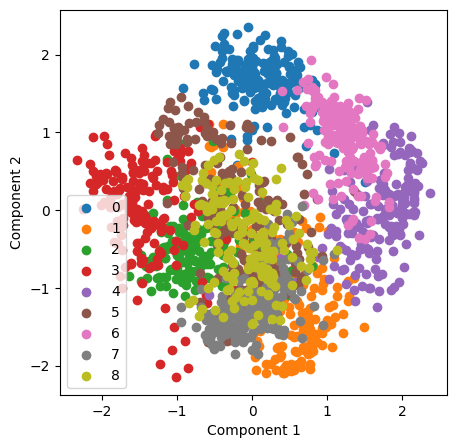

In [15]:
target_ids = range(len(mnist.target_names))
plt.figure(figsize=(5, 5))
for i, c, label in zip(target_ids, colors, mnist.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [16]:
pca.n_components

10

In [17]:
explained_var = pca.explained_variance_ratio_
print(f'''The explained variance of PC1 is {explained_var[0]:.2%}
The explained variance of PC2 is {explained_var[1]:.2%}
The total explained variance is {explained_var.sum():.2%}''')

The explained variance of PC1 is 14.89%
The explained variance of PC2 is 13.62%
The total explained variance is 73.82%


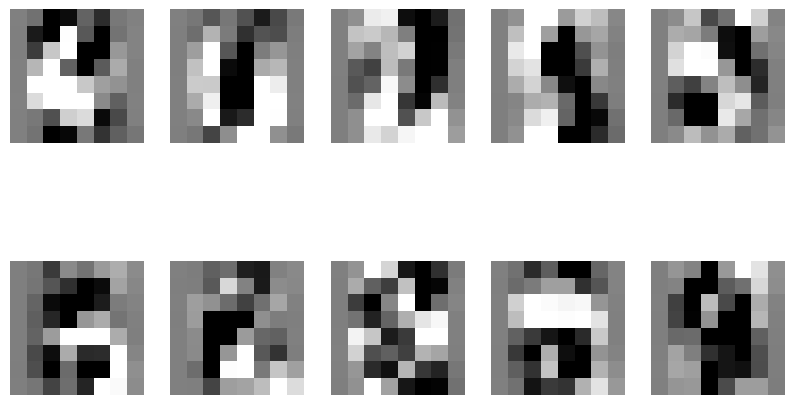

In [18]:
plt.figure(figsize=(10, 6))
for i in range(pca.n_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(8,8), interpolation='nearest', clim=(-.15, .15), cmap='gray');
    plt.axis('off');
    

## Singular Value Decomposition (SVD)

The singular value decomposition of an $m\times n$ matrix $M$ is a factorization of the form: 

$$M = U {\Sigma } V^{T} $$

where:


- $U$ is an ${\displaystyle m\times m}$ orthogonal rotation matrix, 

- ${\Sigma }$ is an ${\displaystyle m\times n}$ rectangular diagonal matrix of singular values, and

- $V^{T}$ is an $n\times n$ orthogonal rotation matrix.


Use cases for the SVD:

- Optimization and computational linear algebra: computing the pseudoinverse, solving homogeneous systems of linear equations, etc.

- Machine learning and statistics: dimension reduction via the principal component analysis (PCA) algorithm

- Applications: image compression

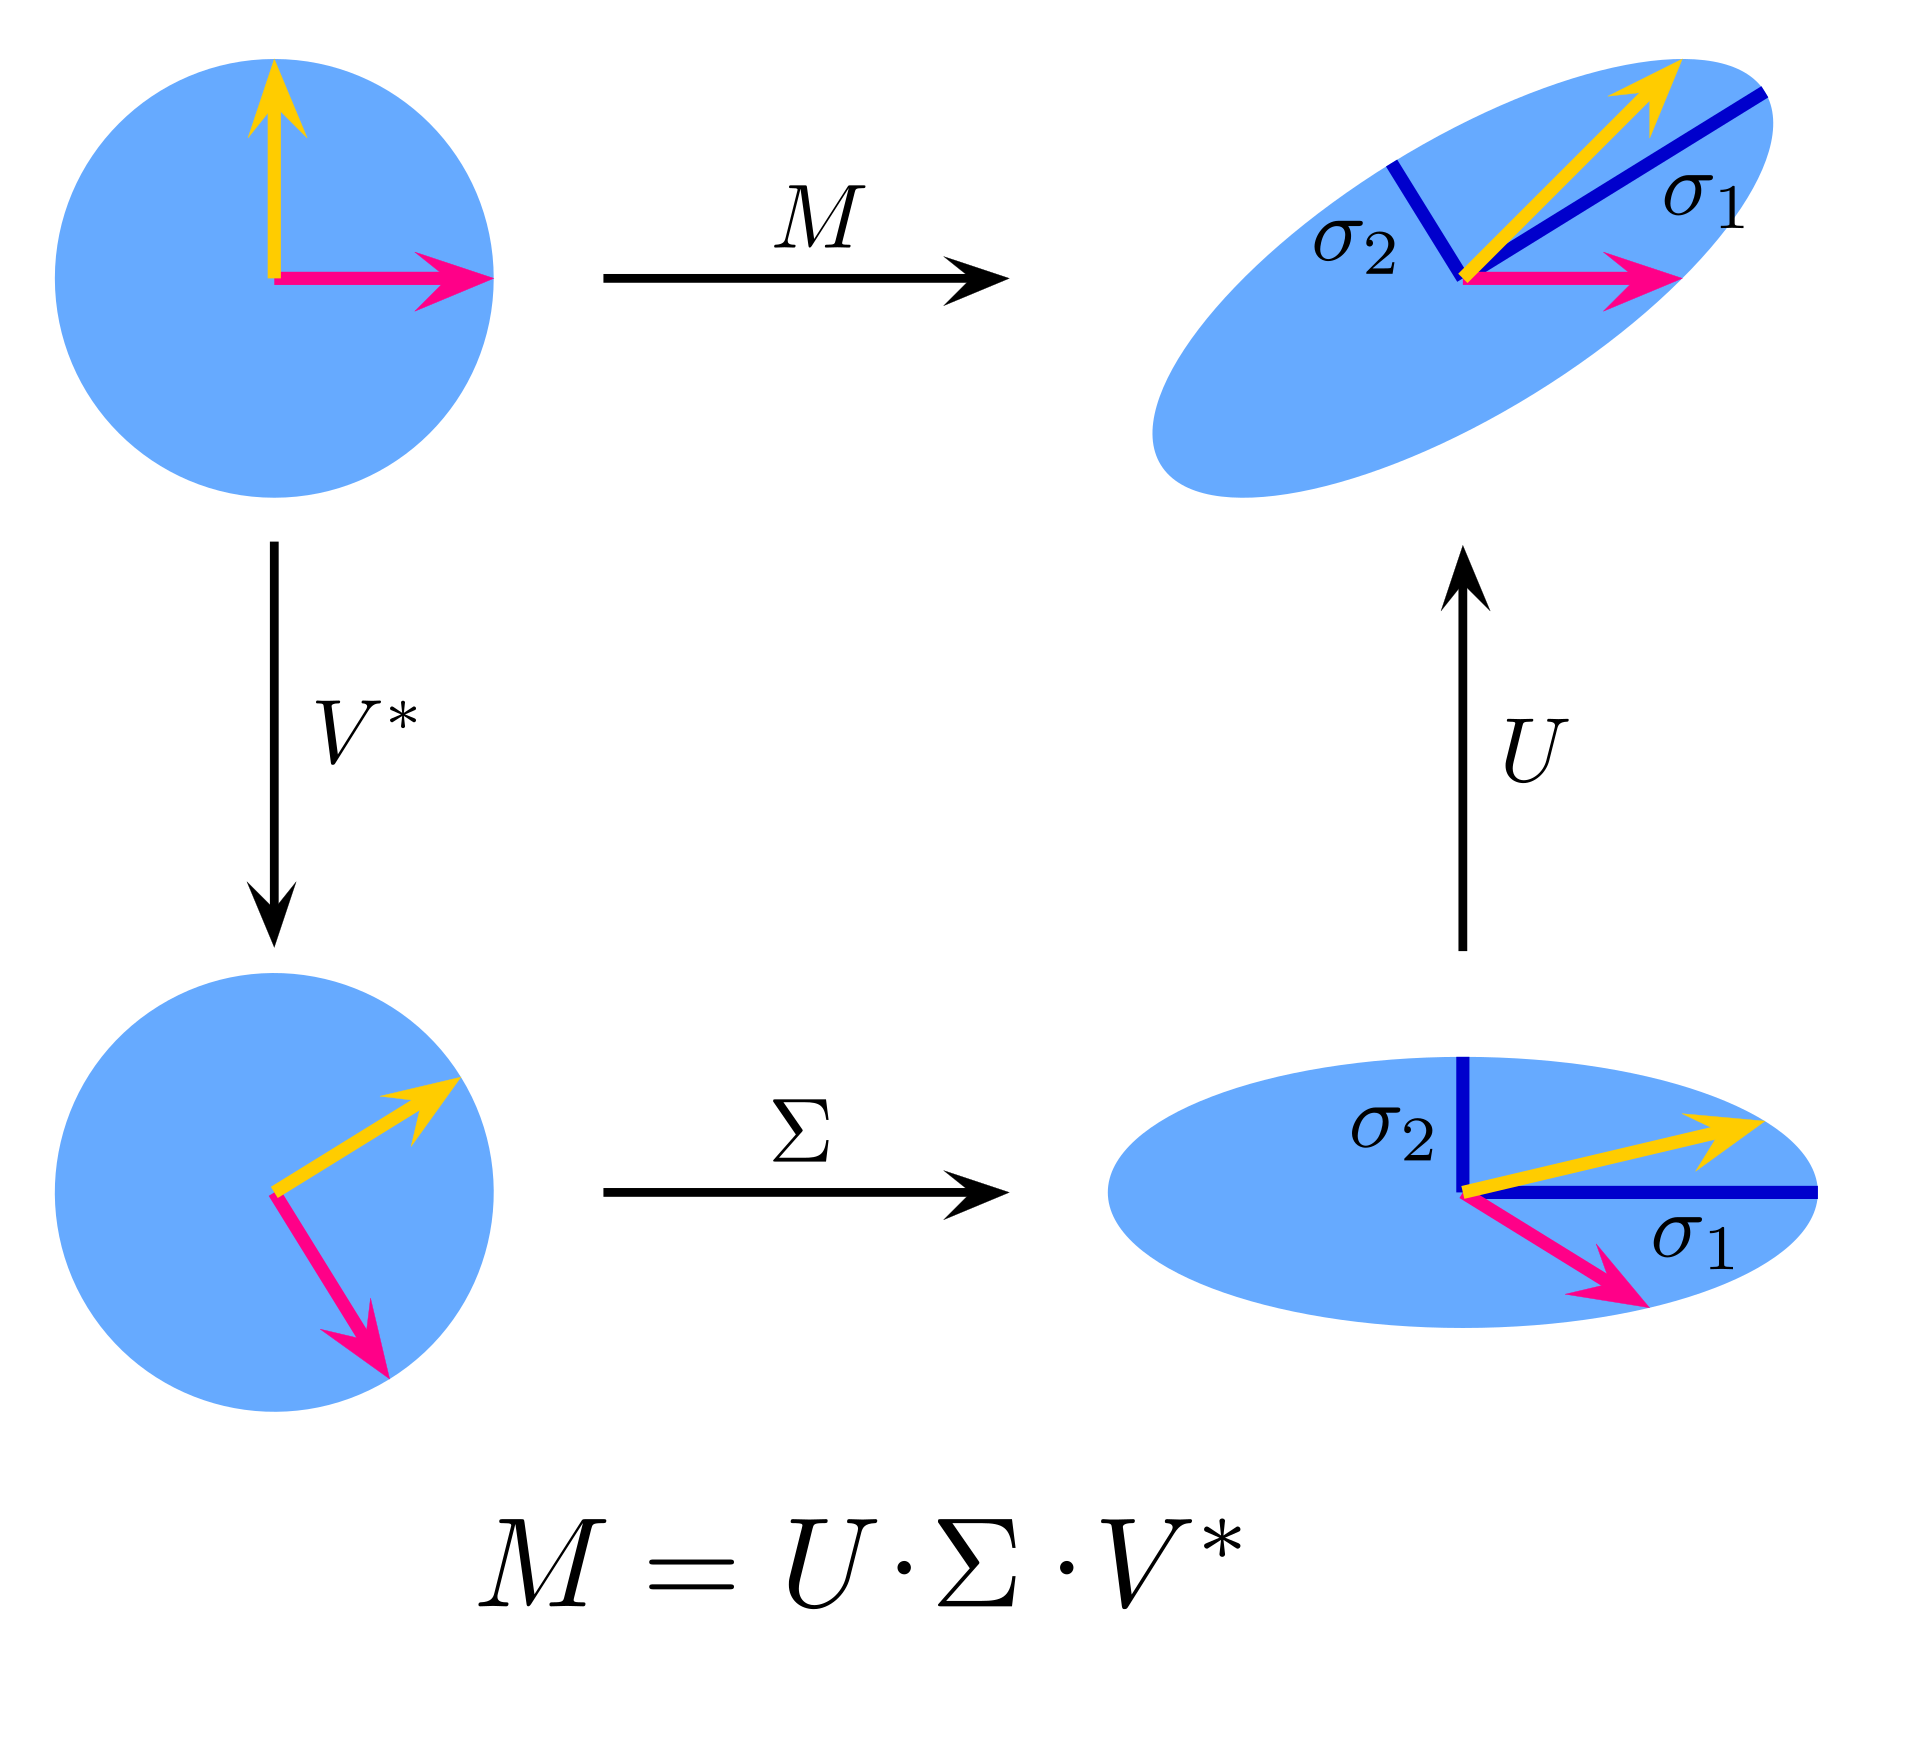

In [19]:
from IPython.display import Image
Image('svd_cartoon.png', width=500)

The singular value decomposition can be done with the `linalg.svd()` function from NumPy (note that `np.linalg.eig(A)` works only on square matrices and will give an error for `A`).

In [20]:
M = np.array([[7, 2], [3, 4], [5, 3]])
U, S, V = np.linalg.svd(M)

In [21]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [22]:
S

array([10.25142677,  2.62835484])

In [23]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

## Image Compression via the Singular Value Decomposition

Load image as ${\displaystyle n\times m}$ matrix of [RGB] values and grayscale it so we are left with ${\displaystyle n\times m}$ matrix of pixel intensity values:

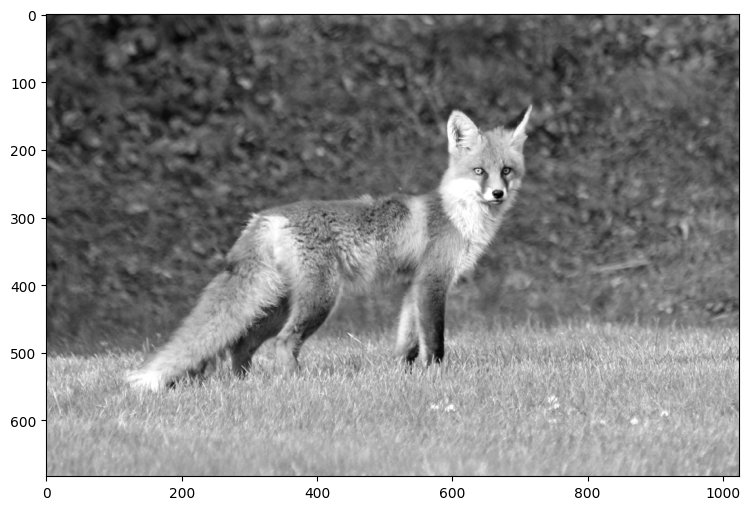

In [24]:
from PIL import Image
img = Image.open('fox.jpeg') # load
imggray = img.convert('LA') # grayscale
imgmat = np.array(list(imggray.getdata(band=0)), float) # convert to numpy array
imgmat.shape = (imggray.size[1], imggray.size[0]) # get handle on dimensions
plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

Compute the SVD using NumPy :

In [25]:
U, S, V = np.linalg.svd(imgmat)
print("img: {}; U: {}; S: {}; V: {}".format(imgmat.shape, U.shape, S.shape, V.shape))

img: (683, 1024); U: (683, 683); S: (683,); V: (1024, 1024)


Iterate over list of singular values and plot the reconstructed image for each value:

img: (683, 1024)
U': (683, 5)
S': (5, 5)
V': (5, 1024)


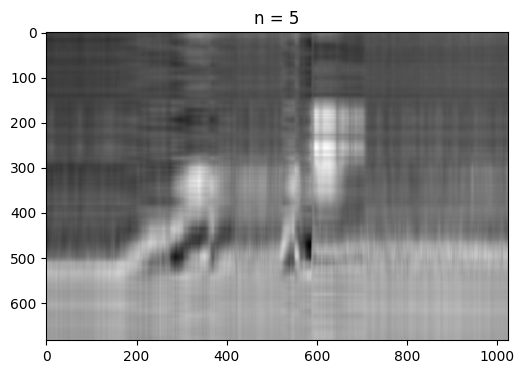

img: (683, 1024)
U': (683, 10)
S': (10, 10)
V': (10, 1024)


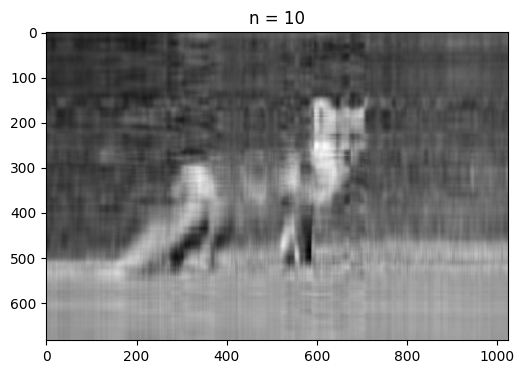

img: (683, 1024)
U': (683, 25)
S': (25, 25)
V': (25, 1024)


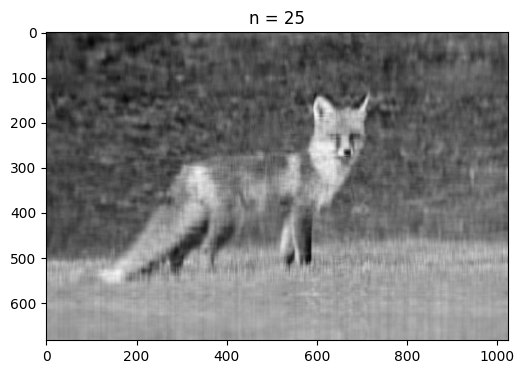

img: (683, 1024)
U': (683, 50)
S': (50, 50)
V': (50, 1024)


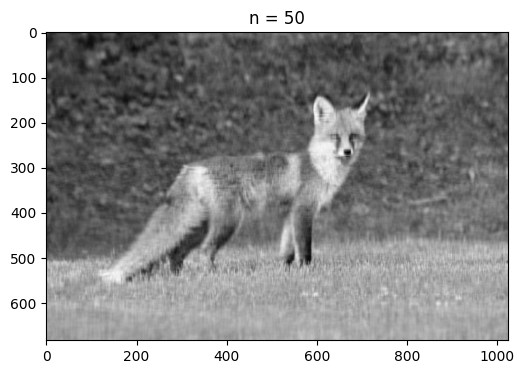

img: (683, 1024)
U': (683, 100)
S': (100, 100)
V': (100, 1024)


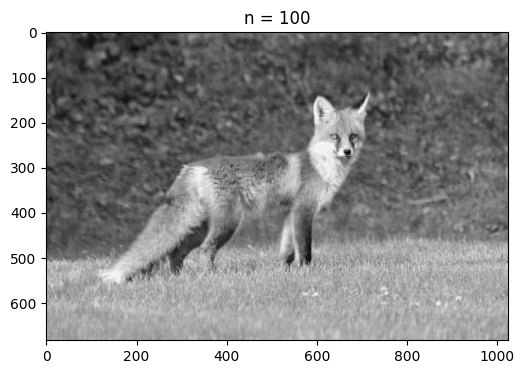

In [26]:
for i in [5, 10, 25, 50, 100]:
    reconstruct_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    print("img: {}\nU': {}\nS': {}\nV': {}".format(imgmat.shape, U[:, :i].shape, np.diag(S[:i]).shape,V[:i, :].shape))
    plt.figure(figsize=(6, 4))
    plt.imshow(reconstruct_img, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

## Relation between PCA and SVD
Simply put, the PCA viewpoint requires that one compute the eigenvalues and eigenvectors of the covariance matrix, which is the product $\frac{1}{n}XX^T$, where $X$
is the centered data matrix. Since the covariance matrix is symmetric, the matrix is diagonalizable, and the eigenvectors can be normalized such that they are orthonormal:
$$ \frac{1}{n}XX^T = \frac{1}{n-1}WDW^T $$

On the other hand, applying SVD to the data matrix $X$ as follows:
$$ X = U\Sigma V^T $$

and attempting to construct the covariance matrix from this decomposition gives
$$\frac{1}{n-1} XX^T = \frac{1}{n-1}(U \Sigma V^T) (U \Sigma V^T)^T = \frac{1}{n-1}(U \Sigma V^T)( V\Sigma U^T)$$

and since $V$ is an orthogonal matrix $(V^T V = I)$,
$$ \frac{1}{n-1}XX^T  = \frac{1}{n-1} U\Sigma^2 U^T $$
and the correspondence is easily seen (the square roots of the eigenvalues of $XX^T$ are the singular values of $X$, etc.)

### Visualize the penguins dataset

In [27]:
penguins = load_penguins().dropna()
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = penguins['species']
print(X.shape, y.shape)
# X.head()
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X -= X_mean.to_numpy()
X /= X_std.to_numpy()

(333, 4) (333,)


In [28]:
class0 = X[y=='Adelie'].to_numpy()
class1 = X[y=='Chinstrap'].to_numpy()
class2 = X[y=='Gentoo'].to_numpy()

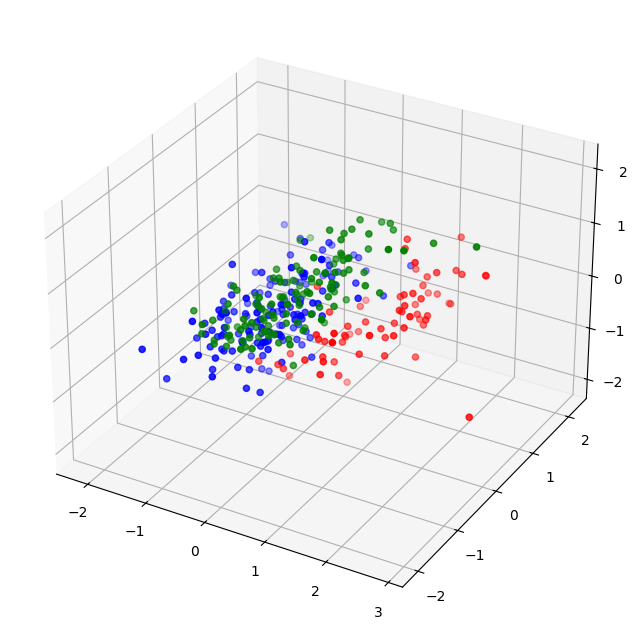

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class0[:, 0], class0[:, 1], class0[:, 2], c='blue')
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], c='red')
ax.scatter(class2[:, 0], class2[:, 1], class2[:, 2], c='green')

In [30]:
U, S, Vh = np.linalg.svd(X.T)
print(U.shape, S.shape, Vh.shape)


(4, 4) (4,) (333, 333)


In [31]:
U = U[:, :]
print(U.shape, class0.shape)
Y_0 = U.T @ class0.T
Y_1 = U.T @ class1.T
Y_2 = U.T @ class2.T

(4, 4) (146, 4)


Text(0.5, 0, 'Principal Component 3')

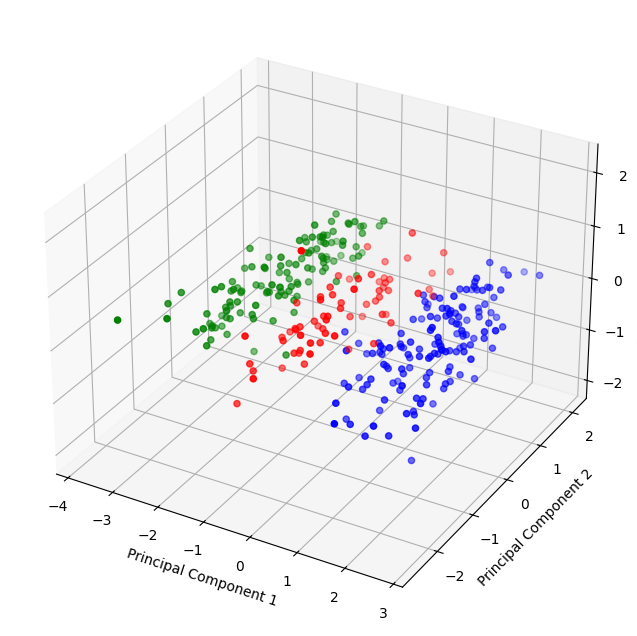

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y_0[0], Y_0[1], Y_0[2], c='blue')
ax.scatter(Y_1[0], Y_1[1], Y_1[2], c='red')
ax.scatter(Y_2[0], Y_2[1], Y_2[2], c='green')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

## Linear Discriminator Analysis
While goal of PCA is to find components that maximize the variance, LDA makes use of the class labels to maximize the ratio of the between-class scatter matrix to the within-class scatter matrix. 

In [36]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Loading 28x28 MNIST to show classification performance.
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

lda.fit(X, y)
lda = LinearDiscriminantAnalysis(n_components=2)

In [37]:
X_lda = lda.transform(X)

NotFittedError: This LinearDiscriminantAnalysis instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [38]:
plt.figure(figsize=(5, 5))
for i, c, label in zip(target_ids, colors, mnist.target_names):
    plt.scatter(X_lda[y==i, 0], X_lda[y==i, 1], c=c, label=label)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 333 but corresponding boolean dimension is 70000

<Figure size 500x500 with 0 Axes>

## Classification using LDA
Since LDA is a supervised learning setup, it can directly be used as a classification algorithm as demonstrated below.

In [39]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Loading 28x28 MNIST to show classification performance.
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

In [41]:
X_test_lda = lda.transform(X_test)
y_pred = lda.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.8677142857142857
